
# Location State = {A,B,C,E,F,G,H,I,J,K,L}

# R : (state,action) → r ∈R 

#  S{0,1,2,3,4,5,6,7,88,9,10,11}





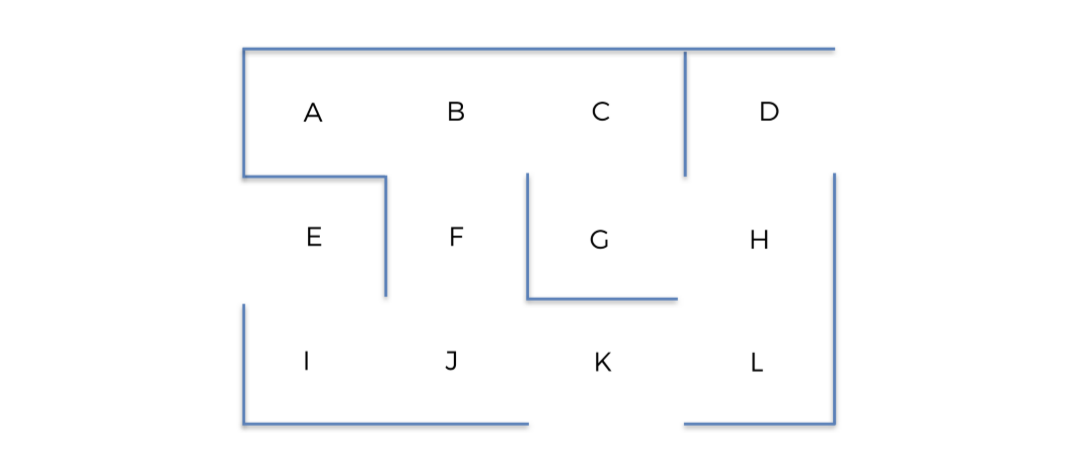



# Matrice stockant les liens possibles entre les States location avec un Boolean

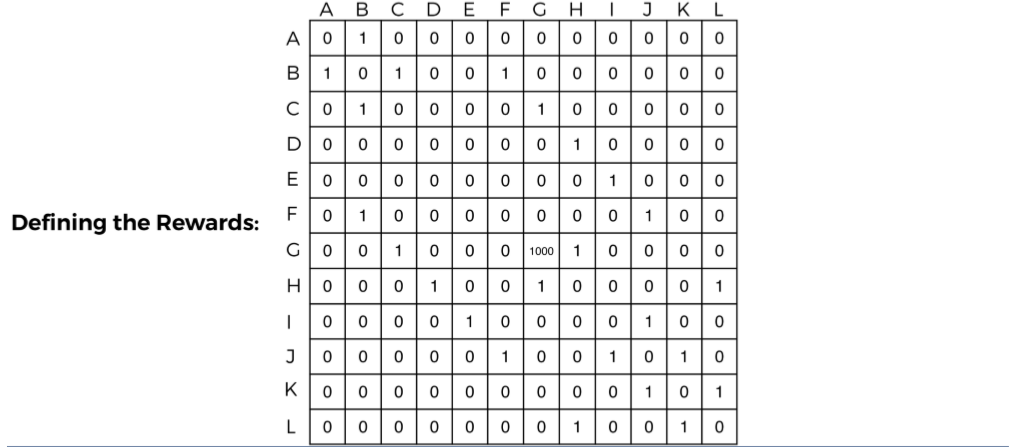


# Reinforcement learning with TF by Q-learning 
https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0


http://citeseer.ist.psu.edu/viewdoc/summary?doi=10.1.1.32.7692

# Equation de Bellman
http://www.lpsm.paris/pageperso/pham/Tangente.pdf
https://www.rand.org/content/dam/rand/pubs/papers/2008/P550.pdf
s- State
a- Action

Le temporel Diﬀerence
Au début t = 0, toutes les valeurs Q sont initialisées à 0 :
∀s ∈ S,a ∈ A,Q(s,a) = 0

Supposons maintenant que nous sommes au temps t, dans un certain état st. Nous jouons une action aléatoire at, qui nous amène à l'état st+1 et nous obtenons la récompense R(st,at).

Nous pouvons maintenant présenter le site temporel Diﬀerence, qui est au cœur du Q-Learning. Le Diﬀerence temporel au temps t, désigné par TDt(st,at), est le diﬀerence entre :
 - R(st,at)+γmax a (Q(st+1,a)), c'est-à-dire la récompense R(st,at) obtenue en jouant l'action a dans l'état st, plus la valeur Q de la meilleure action jouée dans le futur état st+1, actualisée par un facteur γ ∈ [0,1], appelé le facteur d'actualisation. 

- Et Q(st,at), c'est-à-dire la valeur Q de l'action à jouée dans l'état st, 

# Processus de décision Markovien
http://www.prodstyr.ihh.kvl.dk/pdf/notat49.pdf
https://www.cs.uml.edu/ecg/uploads/AIfall14/MDPApplications3.pdf
1.2.1 Processus de décision Markov

 Un processus de décision Markov est un tuple (S,A,T,R) où :
 - S est l'ensemble des états de diﬀerent. Par conséquent, dans notre étude de cas : S = {0,1,2,3,4,5,6,7,8,9,10,11} 
- A est l'ensemble des actions diﬀerent qui peuvent être jouées à chaque instant t. C'est pourquoi dans notre étude de cas : A = {0,1,2,3,4,5,6,7,8,9,10,11} - T est appelé la règle de transition : T : (st ∈ S,st+1 ∈ S,at ∈ A) →P(st+1|st,at) où P(st+1|st,at) est la probabilité d'atteindre l'état futur st+1 en jouant l'action at dans l'état st. Par conséquent, T est la distribution de probabilité des états futurs au temps t+1 étant donné l'état actuel et l'action jouée au temps t. En conséquence, nous pouvons prédire l'état futur st+1 en effectuant un tirage au sort de cette distribution T :
st+1 ∼ T(st,.,at) Dans notre étude de cas, vous verrez à travers notre implémentation que cette distribution T de notre IA sera simplement la distribution uniforme, ce qui est un choix classique de distribution fonctionnant très bien lors de l'apprentissage du Q-Learning.
 - R est la fonction de récompense :R : (st ∈ S,at ∈ A) → rt ∈R où rt est la récompense obtenue après avoir joué l'action à dans l'état st. Dans notre étude de cas, cette fonction de récompense est exactement la matrice que nous avons définie  précédemment.
Le MDP étant défini, il est maintenant important de rappeler qu'elle repose sur l'hypothèse suivante : la probabilité de l'état futur st+1 ne dépend que de l'état actuel st et de l'action at, et ne dépend d'aucun des états et actions précédents. C'est-à-dire :
P(st+1|s0,a0,s1,a1,...,st,at) = P(st+1|st,at)
En d'autres termes, un processus de décision Markov n'a pas de mémoire.

Récapitulons maintenant ce qui se passe en termes de PDM. A chaque instant t :
1. L'AI observe l'état actuel st.
2. L'IA joue l'action à . 
3. L'IA reçoit la récompense rt = R(st,at). 
4. L'IA entre dans l'état suivant st+1.
La question est donc maintenant la suivante :

### Comment l'IA sait-elle quelle action jouer à chaque instant t



In [1]:
import numpy as np


# deux variable à initialiser
#alpha -> learning rate

gamma = 0.75
alpha = 0.9


In [2]:
# 1- Definir l'environnement

#Dictionnaire d'état
# faire une relation état à clé
position_to_etat = {'A': 0,
                     'B': 1,
                     'C': 2, 
                     'D': 3, 
                     'E': 4,
                     'F': 5, 
                     'G': 6, 
                     'H': 7, 
                     'I': 8, 
                     'J': 9, 
                     'K': 10,
                     'L': 11}



In [3]:
#Définir la récompense (Markov)
#Matrice de déplacemnt (Théorie des graphs)

R = np.array([[0,1,0,0,0,0,0,0,0,0,0,0],
               [1,0,1,0,0,1,0,0,0,0,0,0],
               [0,1,0,0,0,0,1,0,0,0,0,0],
               [0,0,0,0,0,0,0,1,0,0,0,0],
               [0,0,0,0,0,0,0,0,1,0,0,0],
               [0,1,0,0,0,0,0,0,0,1,0,0],
               [0,0,1,0,0,0,1000,1,0,0,0,0],
               [0,0,0,1,0,0,1,0,0,0,0,1],
               [0,0,0,0,1,0,0,0,0,1,0,0],
               [0,0,0,0,0,1,0,0,1,0,1,0],
               [0,0,0,0,0,0,0,0,0,1,0,1],
               [0,0,0,0,0,0,0,1,0,0,1,0]])

print(R)

[[   0    1    0    0    0    0    0    0    0    0    0    0]
 [   1    0    1    0    0    1    0    0    0    0    0    0]
 [   0    1    0    0    0    0    1    0    0    0    0    0]
 [   0    0    0    0    0    0    0    1    0    0    0    0]
 [   0    0    0    0    0    0    0    0    1    0    0    0]
 [   0    1    0    0    0    0    0    0    0    1    0    0]
 [   0    0    1    0    0    0 1000    1    0    0    0    0]
 [   0    0    0    1    0    0    1    0    0    0    0    1]
 [   0    0    0    0    1    0    0    0    0    1    0    0]
 [   0    0    0    0    0    1    0    0    1    0    1    0]
 [   0    0    0    0    0    0    0    0    0    1    0    1]
 [   0    0    0    0    0    0    0    1    0    0    1    0]]


In [4]:
#algo Q- learning
    
#init Q-Values

Q = np.array(np.zeros([12,12]))

print(Q)
print(R.shape[1])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
12


In [5]:
# Définition de la foncrion de difference temporelle
#https://en.wikipedia.org/wiki/Temporal_difference_learning

for i in range (0,1000):
    etat_t = np.random.randint(0, 12) #exclusion de la bande supérieure -> +1
    mouvement_possible = []
    for k in range (R.shape[1]):
        if R[etat_t, k] > 0: #création de la liste des mouvement possible
            mouvement_possible.append(k) #stockage des choix possible dans une liste
    etat_suivant = np.random.choice(mouvement_possible) #choix aléatoire dans la liste
    DT = R[etat_t,  etat_suivant] + gamma * Q[etat_suivant, np.argmax(Q[etat_suivant,])] - Q[etat_t, etat_suivant]
    Q[etat_t, etat_suivant] += alpha * DT
    


In [6]:
#matrice des routes prioritaires : sélectionner la plus hautes valeurs

print(Q.astype(int))

[[   0 1683    0    0    0    0    0    0    0    0    0    0]
 [1263    0 2243    0    0 1263    0    0    0    0    0    0]
 [   0 1682    0    0    0    0 2992    0    0    0    0    0]
 [   0    0    0    0    0    0    0 2243    0    0    0    0]
 [   0    0    0    0    0    0    0    0  711    0    0    0]
 [   0 1683    0    0    0    0    0    0    0  944    0    0]
 [   0    0 2243    0    0    0 3988 2242    0    0    0    0]
 [   0    0    0 1673    0    0 2989    0    0    0    0 1682]
 [   0    0    0    0  533    0    0    0    0  948    0    0]
 [   0    0    0    0    0 1262    0    0  701    0 1262    0]
 [   0    0    0    0    0    0    0    0    0  948    0 1683]
 [   0    0    0    0    0    0    0 2243    0    0 1257    0]]


In [7]:
#passer de l'état à la position // inversion du dictionnaire initial
etat_to_position = {etat : position for position, etat in position_to_etat.items()}

print(etat_to_position)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L'}


In [8]:
etat_to_position = {etat : position for position, etat in position_to_etat.items()}

print(etat_to_position)

def Route(position_depart, position_finale):
    route = [position_depart] #initialisation de la route qui commence à la position de départ
    position_suivante = position_depart #initialisation de la position
    while (position_suivante != position_finale): #tant que la position cible n'est pas atteinte
        etat_depart = position_to_etat[position_depart] #prend dans le dictionnaire
        etat_suivant = np.argmax(Q[etat_depart,])# prend la valeur la plus élevé dans la matrice des routes
        position_suivante = etat_to_position[etat_suivant]#donne la position suivante en passant par le dictionnaire i
        route.append(position_suivante)
        position_depart = position_suivante
    return route

#test

print('Route:')
Route('E', 'G')

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L'}
Route:


['E', 'I', 'J', 'K', 'L', 'H', 'G']